# Setup

In [1]:
import requests
import pandas as pd

# Download latest file

In [2]:
todays_date = str(pd.to_datetime('today').date())

In [3]:
url = 'https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/VOC_VOI_Tabelle.xlsx?__blob=publicationFile'

resp = requests.get(url)
with open("../data//raw/{}_variants_raw.xls".format(todays_date), 'wb') as output:
    output.write(resp.content)

# Load file

In [4]:
xls = pd.ExcelFile("../data/raw/{}_variants_raw.xls".format(todays_date))

df = pd.read_excel(xls, 'VOC')

In [5]:
df.columns

Index(['KW', 'B.1.1.7_Anzahl', 'B.1.1.7_Anteil (%)',
       'B.1.351+B.1.351.1+B.1.351.2+B.1.351.3_Anzahl',
       'B.1.351+B.1.351.1+B.1.351.2+B.1.351.3_Anteil (%)',
       'B.1.617.2+AY.1+AY.2+AY.3_Anzahl',
       'B.1.617.2+AY.1+AY.2+AY.3_Anteil (%)', 'P.1+P.1.1+P.1.2_Anzahl',
       'P.1+P.1.1+P.1.2_Anteil (%)', 'Gesamt_Anzahl', 'Gesamt_Anteil (%)'],
      dtype='object')

# Data preparation

In [6]:
# in the latest report some columns contain multiple sublines of variants
variant_dict = {'B.1.351\+B.1.351.1\+B.1.351.2\+B.1.351.3': 'B.1.351',
              'P.1\+P.1.1\+P.1.2': 'P.1',
              'B.1.617.2\+AY.1\+AY.2\+AY.3': 'B.1.617.2'}

In [7]:
df.columns = pd.Series(df.columns.values).replace(variant_dict, regex=True)

In [8]:
df = df.iloc[:-1, ]
df.KW = df.KW.str[2:].astype(int)
df.columns = [c.strip(' \(\%\)').replace('Anzahl', 'count').replace('Anteil', 'proportion').replace('Gesamt', 'total') if c != 'KW' else 'week' for c in df.columns]
df = df.round(1)

In [9]:
df.tail()

,week,B.1.1.7_count,B.1.1.7_proportion,B.1.351_count,B.1.351_proportion,B.1.617.2_count,B.1.617.2_proportion,P.1_count,P.1_proportion,total_count,total_proportion
23,24,552,52.5,11,1.0,414,39.4,14,1.3,991,94.2
24,25,245,32.5,3,0.4,451,59.9,7,0.9,706,93.8
25,26,156,18.9,1,0.1,631,76.5,15,1.8,803,97.3
26,27,76,10.1,1,0.1,643,85.7,15,2.0,735,98.0
27,28,34,6.0,0,0.0,521,91.4,9,1.6,564,98.9


# Export

In [10]:
df.to_csv('../data/archive/{}_variants_of_concern_sample.csv'.format(todays_date), index=False)

# Plot

In [11]:
df.set_index('week', inplace=True)

In [12]:
# select columns with proportions
cols = [c for c in df.columns if 'proportion' in c and c != 'total_proportion']
df2 = df[cols]
df2.columns = [c.split('_')[0] for c in df2.columns]

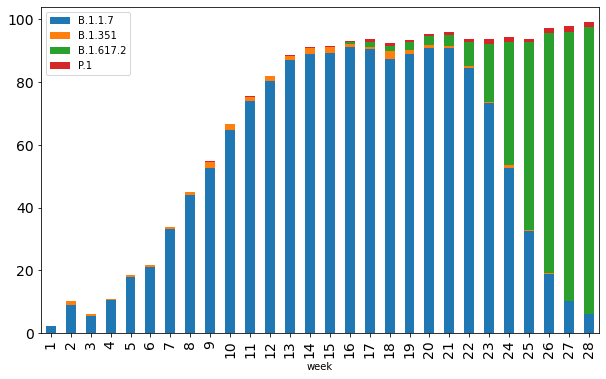

In [15]:
ax = df2.plot(kind='bar', stacked=True, figsize=[10, 6], fontsize=14)